In [1]:
import pandas as pd
import numpy as np
from pprint import pprint

In [2]:
df = pd.read_csv("Toddler Autism dataset July 2018.csv")
df

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


In [4]:
df = df.drop('Qchat-10-Score', axis=1)

In [5]:
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,f,White European,no,yes,family member,Yes


In [6]:
qchat_mapping = {
    'A1': 'response_to_name',
    'A2': 'eye_contact_ease',
    'A3': 'points_to_desired_object',
    'A4': 'points_to_share_interest',
    'A5': 'engages_in_pretend_play',
    'A6': 'follows_where_looking',
    'A7': 'offers_comfort_when_upset',
    'A8': 'typicality_of_first_words',
    'A9': 'uses_simple_gestures',
    'A10': 'stares_at_nothing'
}
df = df.rename(columns=qchat_mapping)

In [7]:
df.columns.tolist()

['Case_No',
 'response_to_name',
 'eye_contact_ease',
 'points_to_desired_object',
 'points_to_share_interest',
 'engages_in_pretend_play',
 'follows_where_looking',
 'offers_comfort_when_upset',
 'typicality_of_first_words',
 'uses_simple_gestures',
 'stares_at_nothing',
 'Age_Mons',
 'Sex',
 'Ethnicity',
 'Jaundice',
 'Family_mem_with_ASD',
 'Who completed the test',
 'Class/ASD Traits ']

In [8]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['Sex', 'Ethnicity', 'Jaundice',
                      'Family_mem_with_ASD', 'Who completed the test']
df_encoded = df.copy()
label_encoders = {}
for col in categorical_columns:
    if col in df_encoded.columns:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le
        print(f"Encoded '{col}': {dict(zip(le.classes_,le.transform(le.classes_)))} \n")

Encoded 'Sex': {'f': np.int64(0), 'm': np.int64(1)} 

Encoded 'Ethnicity': {'Hispanic': np.int64(0), 'Latino': np.int64(1), 'Native Indian': np.int64(2), 'Others': np.int64(3), 'Pacifica': np.int64(4), 'White European': np.int64(5), 'asian': np.int64(6), 'black': np.int64(7), 'middle eastern': np.int64(8), 'mixed': np.int64(9), 'south asian': np.int64(10)} 

Encoded 'Jaundice': {'no': np.int64(0), 'yes': np.int64(1)} 

Encoded 'Family_mem_with_ASD': {'no': np.int64(0), 'yes': np.int64(1)} 

Encoded 'Who completed the test': {'Health Care Professional': np.int64(0), 'Health care professional': np.int64(1), 'Others': np.int64(2), 'Self': np.int64(3), 'family member': np.int64(4)} 



In [9]:
df_encoded.iloc[:,12:18]

,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,0,8,1,0,4,No
1,1,5,1,0,4,Yes
2,1,8,1,0,4,Yes
3,1,0,0,0,4,Yes
4,0,5,0,1,4,Yes
...,...,...,...,...,...,...
1049,0,5,0,1,4,No
1050,1,7,1,0,4,Yes
1051,1,8,1,0,4,Yes
1052,1,5,0,1,4,No


In [10]:
df_encoded.iloc[:,12:18].describe()

,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,0.697343,5.863378,0.273245,0.161290,3.885199
std,0.459626,2.098325,0.445837,0.367973,0.639852
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.000000,0.000000,0.000000,4.000000
50%,1.000000,6.000000,0.000000,0.000000,4.000000
75%,1.000000,7.000000,1.000000,0.000000,4.000000
max,1.000000,10.000000,1.000000,1.000000,4.000000


Preparing the target variables, by converting to binary.

In [11]:
target_col = 'Class/ASD Traits '
df_encoded[target_col] = df_encoded[target_col].map({'Yes': 1, 'No': 0})
df_encoded[target_col].value_counts()

Class/ASD Traits 
1    728
0    326
Name: count, dtype: int64

Calculating class weights for handling imbalance

In [12]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(df_encoded[target_col]),
    y=df_encoded[target_col])
class_weights

array([1.61656442, 0.7239011 ])

Drop Case_No to prevent data leakage

In [13]:
if 'Case_No' in df_encoded.columns:
    df_encoded = df_encoded.drop('Case_No', axis=1)

Splitting the data

In [14]:
X = df_encoded.drop(target_col, axis = 1)
y = df_encoded[target_col]
feature_names = X.columns.tolist()

First split: train+val vs test

In [15]:
from sklearn.model_selection import train_test_split
test_size = 0.15
random_state = 42
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size = test_size, random_state = random_state, stratify=y
)

In [16]:
val_size = 0.15
val_size_adjusted = val_size /(1- test_size)

In [17]:
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size = val_size_adjusted,
    random_state = random_state, stratify = y_temp
)

In [18]:
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 737 samples
Validation set: 158 samples
Test set: 159 samples


Scaling features using StandardScaler.

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Converting to dataframes (the scaled values are np.ndarray objects)

In [20]:
X_train_scaled = pd.DataFrame(
    X_train_scaled,
    columns=feature_names,
    index = X_train.index
)
X_val_scaled = pd.DataFrame(
    X_val_scaled,
    columns=feature_names,
    index = X_val.index
)
X_test_scaled = pd.DataFrame(
    X_test_scaled,
    columns=feature_names,
    index = X_test.index
)

Applying SMOTE to handle class imbalance [Explain why we're using this]

In [21]:
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning, module='threadpoolctl')

smote = SMOTE(random_state = random_state)
X_train_balanced, y_train_balanced = smote.fit_resample(
    X_train_scaled,
    y_train
)
print(f"Original training set: {X_train_scaled.shape[0]} samples")
print(f"Balanced training set: {X_train_balanced.shape[0]} samples")

Original training set: 737 samples
Balanced training set: 1018 samples


In [22]:
print("X_train_balanced statistics (should be scaled):")
print(f"Mean: {X_train_balanced.mean().mean():.4f}")
print(f"Std: {X_train_balanced.std().mean():.4f}")
print(f"Min: {X_train_balanced.min().min():.4f}")
print(f"Max: {X_train_balanced.max().max():.4f}")

X_train_balanced statistics (should be scaled):
Mean: -0.1376
Std: 0.9843
Min: -6.5831
Max: 2.3377


Exploratory Data Analysis

First, remove trailing spaces (Then we can use 'Class/ASD Traits' instead of 'Class/ASD Traits '). Then, convert target to binary.

In [23]:
df_processed = df.copy()
df_processed.columns = df_processed.columns.str.strip()
target_col = 'Class/ASD Traits'
df_processed[target_col] = df_processed[target_col].map(
    {'Yes': 1, 'No': 0}
)
df_processed[target_col]

0       0
1       1
2       1
3       1
4       1
       ..
1049    0
1050    1
1051    1
1052    0
1053    1
Name: Class/ASD Traits, Length: 1054, dtype: int64

Generating basic statistics and information, and storing them in a dictionary.

In [24]:
stats_dict = {
    'dataset_shape': df_processed.shape,
    'memory_usage': df_processed.memory_usage(deep=True).sum(),
    'data_types': df_processed.dtypes.value_counts().to_dict(),
    'numeric_features': df_processed.select_dtypes(
        include=[np.number]).columns.tolist(),
    'categorical_features': df_processed.select_dtypes(
        include=['object']).columns.tolist()
}
stats_dict

{'dataset_shape': (1054, 18),
 'memory_usage': np.int64(398227),
 'data_types': {dtype('int64'): 13, dtype('O'): 5},
 'numeric_features': ['Case_No',
  'response_to_name',
  'eye_contact_ease',
  'points_to_desired_object',
  'points_to_share_interest',
  'engages_in_pretend_play',
  'follows_where_looking',
  'offers_comfort_when_upset',
  'typicality_of_first_words',
  'uses_simple_gestures',
  'stares_at_nothing',
  'Age_Mons',
  'Class/ASD Traits'],
 'categorical_features': ['Sex',
  'Ethnicity',
  'Jaundice',
  'Family_mem_with_ASD',
  'Who completed the test']}

Analyzing the class distribution

In [25]:
class_counts = df_processed[target_col].value_counts()
class_proportions = df_processed[target_col].value_counts(
    normalize=True
)
distribution_stats = {
    'class_counts': class_counts.to_dict(),
    'class_proportions': class_proportions.to_dict(),
    'is_balanced': abs(class_proportions[0]-class_proportions[1]) < 0.1
}
print(f"No ASD (0): {class_counts[0]} ({class_proportions[0]*100:.1f}%)")
print(f"ASD (1): {class_counts[1]} ({class_proportions[1]*100:.1f}%)")
print(f"Class imbalance ratio: {class_counts[1]/class_counts[0]:.2f}")
print(f"Is balanced: {distribution_stats['is_balanced']}")

No ASD (0): 326 (30.9%)
ASD (1): 728 (69.1%)
Class imbalance ratio: 2.23
Is balanced: False


Visualization (count plot and pie chart)

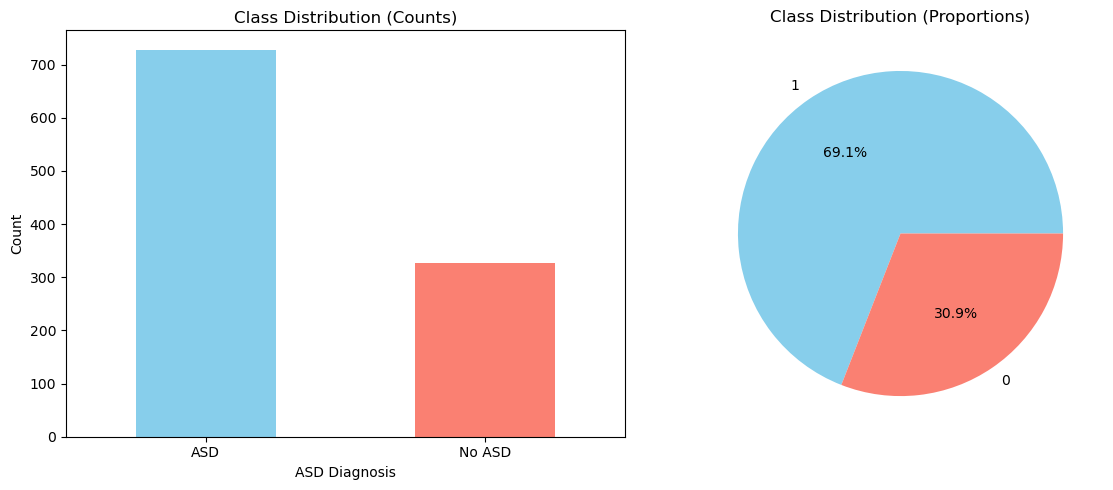

In [26]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
# Count plot
class_counts.plot(kind='bar', ax=ax1, color=['skyblue', 'salmon'])
ax1.set_title('Class Distribution (Counts)')
ax1.set_xlabel('ASD Diagnosis')
ax1.set_ylabel('Count')
ax1.set_xticklabels(['ASD', 'No ASD'], rotation=0)

# Pie chart
class_proportions.plot(kind='pie', ax=ax2, autopct='%1.1f%%',
                      colors=['skyblue', 'salmon'])
ax2.set_title('Class Distribution (Proportions)')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()

Analyze feature distributions

In [27]:
all_numeric_features = stats_dict['numeric_features']
numeric_features = [col for col in all_numeric_features if col != 'Case_No']
categorical_features = stats_dict['categorical_features']
qchat_features = list(qchat_mapping.values())
binary_features = qchat_features + [target_col]
df_processed[numeric_features].describe()

,response_to_name,eye_contact_ease,points_to_desired_object,points_to_share_interest,engages_in_pretend_play,follows_where_looking,offers_comfort_when_upset,typicality_of_first_words,uses_simple_gestures,stares_at_nothing,Age_Mons,Class/ASD Traits
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,0.690702
std,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,0.462424
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,1.000000


Create numeric features and create distribution plots for numeric features

In [28]:
n_numeric = len(numeric_features)
n_cols = 3
n_rows = (n_numeric + n_cols - 1) // n_cols

continuous_features = [col for col in numeric_features 
                       if col not in binary_features]

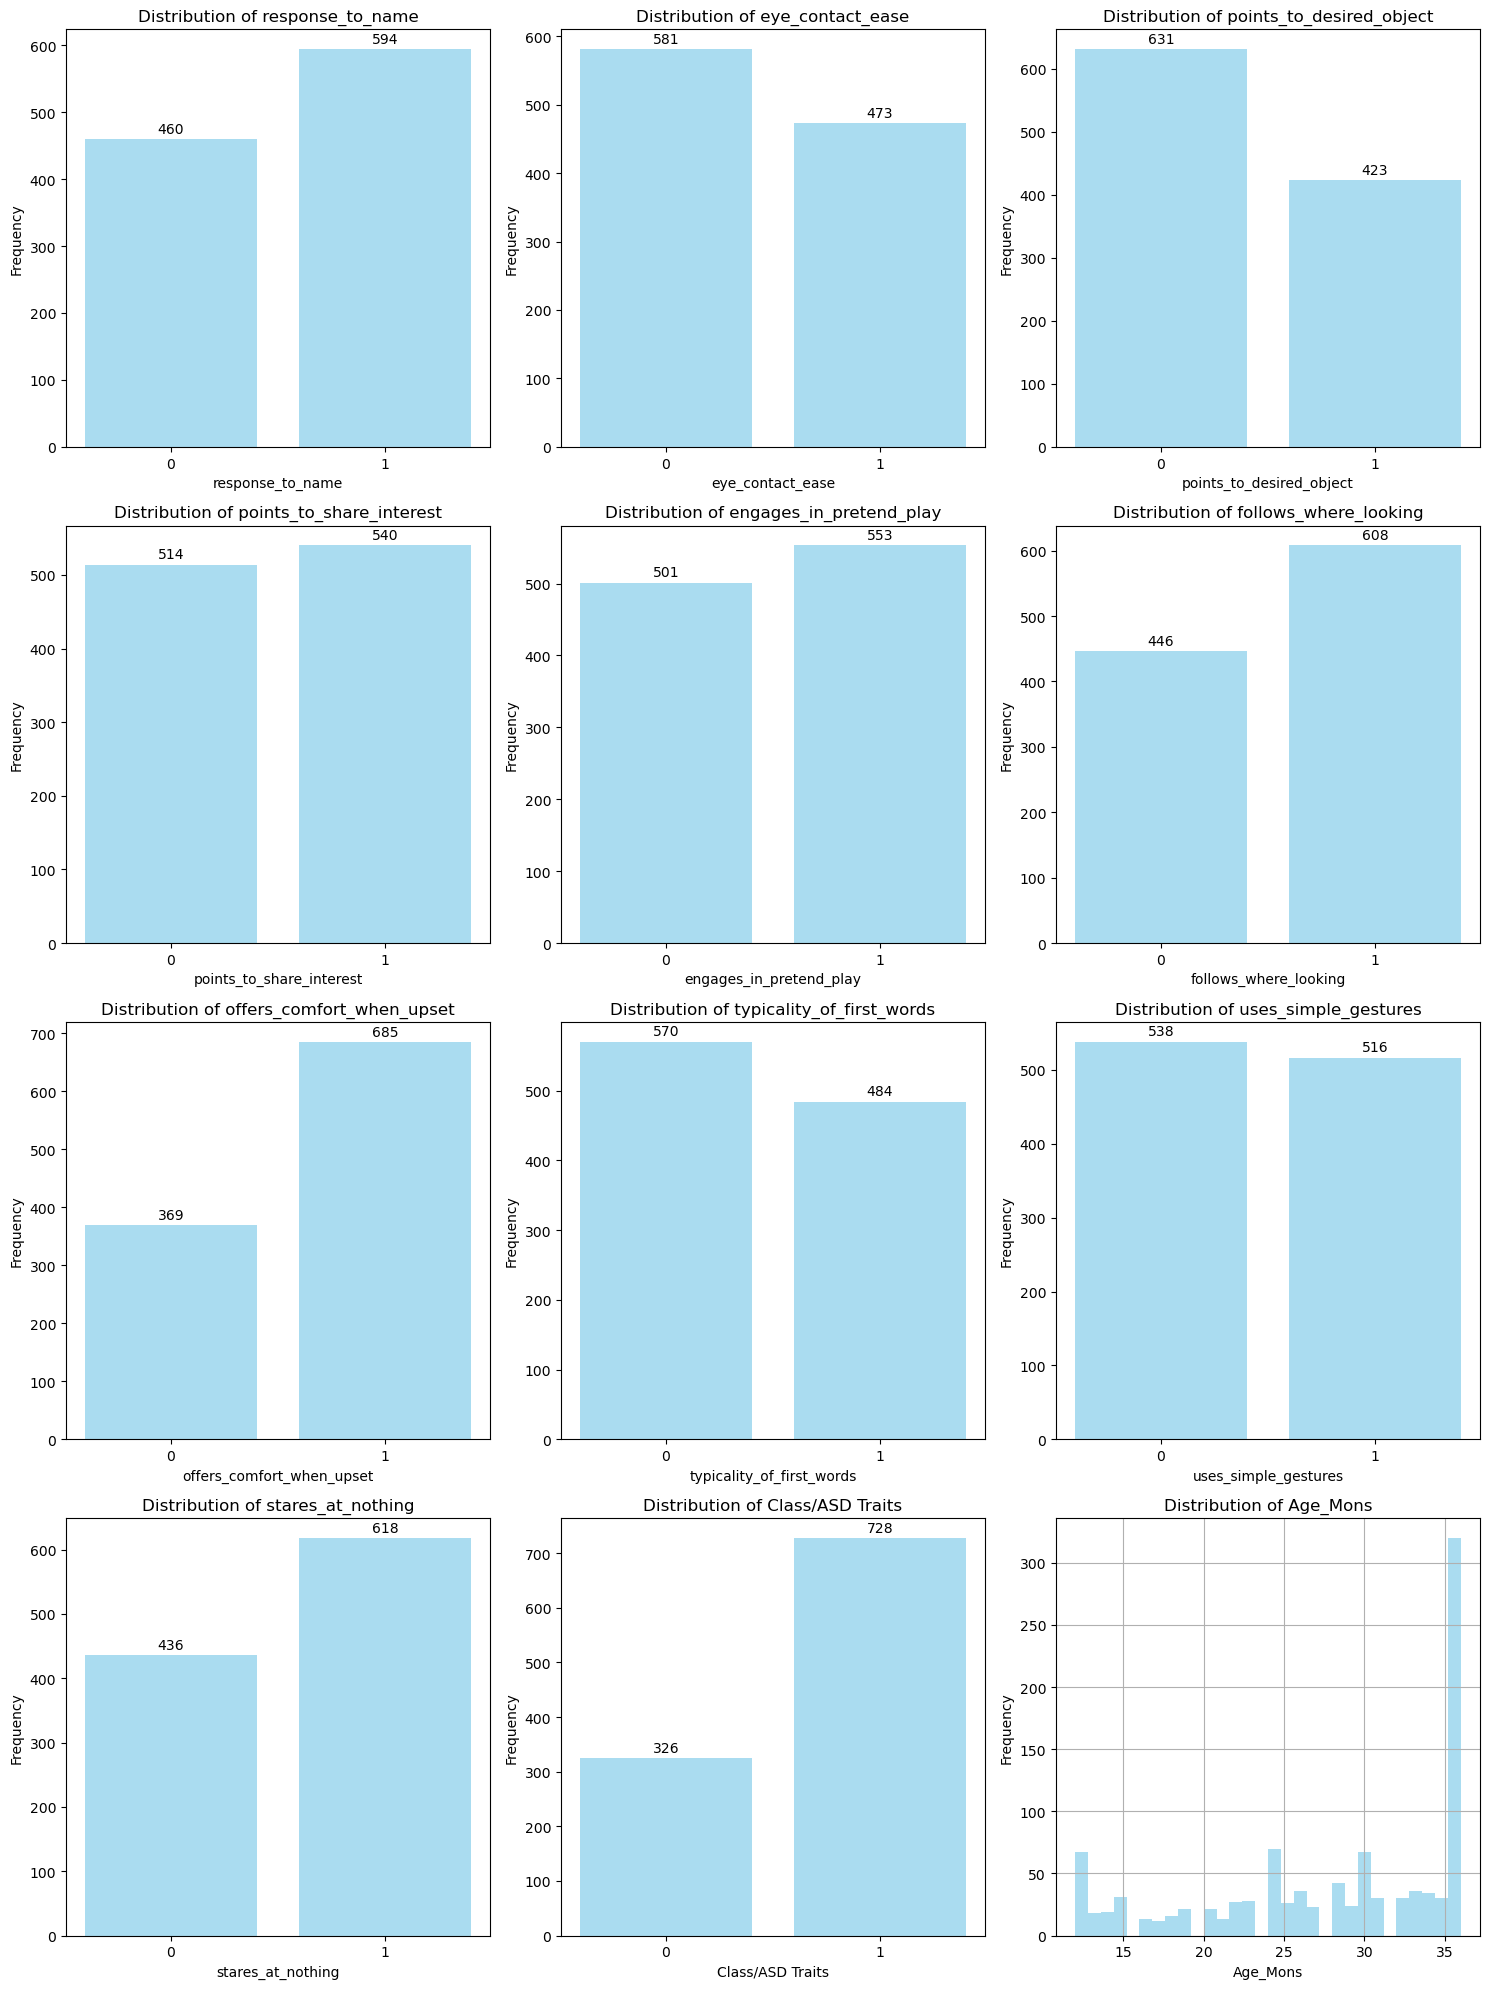

In [29]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))

if n_rows > 1:
    axes = axes.flatten()
if n_rows == 1:
    axes = [axes]

plot_idx = 0

# Plot all binary features with discrete bars
for feature in binary_features:
    if feature in numeric_features and plot_idx < len(axes):
        # Count occurrences of each value
        value_counts = df_processed[feature].value_counts().sort_index()
        
        # Create bar plot for binary data
        bars = axes[plot_idx].bar(value_counts.index, value_counts.values, 
                                color='skyblue', alpha=0.7, width=0.8)
        axes[plot_idx].set_title(f'Distribution of {feature}')
        axes[plot_idx].set_xlabel(feature)
        axes[plot_idx].set_ylabel('Frequency')
        axes[plot_idx].set_xticks([0, 1])
        axes[plot_idx].set_xticklabels(['0', '1'])
        
        # Add value labels on bars
        for bar, count in zip(bars, value_counts.values):
            axes[plot_idx].text(bar.get_x() + bar.get_width()/2, 
                              bar.get_height() + 5, str(count),
                              ha='center', va='bottom')
        
        plot_idx += 1

# Plot continuous features with histograms
for feature in continuous_features:
    if plot_idx < len(axes):
        df_processed[feature].hist(bins=30, ax=axes[plot_idx], 
                                      color='skyblue', alpha=0.7)
        axes[plot_idx].set_title(f'Distribution of {feature}')
        axes[plot_idx].set_xlabel(feature)
        axes[plot_idx].set_ylabel('Frequency')
        plot_idx += 1

# Hide empty subplots
for i in range(plot_idx, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

Analyze categorical features

In [30]:
categorical_summary = {}
for feature in categorical_features:
    if feature != 'Case_No':
        value_counts = df_processed[feature].value_counts()
        categorical_summary[feature] = value_counts.to_dict()
        print(f"{value_counts} \n")

Sex
m    735
f    319
Name: count, dtype: int64 

Ethnicity
White European    334
asian             299
middle eastern    188
south asian        60
black              53
Hispanic           40
Others             35
Latino             26
mixed               8
Pacifica            8
Native Indian       3
Name: count, dtype: int64 

Jaundice
no     766
yes    288
Name: count, dtype: int64 

Family_mem_with_ASD
no     884
yes    170
Name: count, dtype: int64 

Who completed the test
family member               1018
Health Care Professional      24
Health care professional       5
Self                           4
Others                         3
Name: count, dtype: int64 



Analyzing correlation

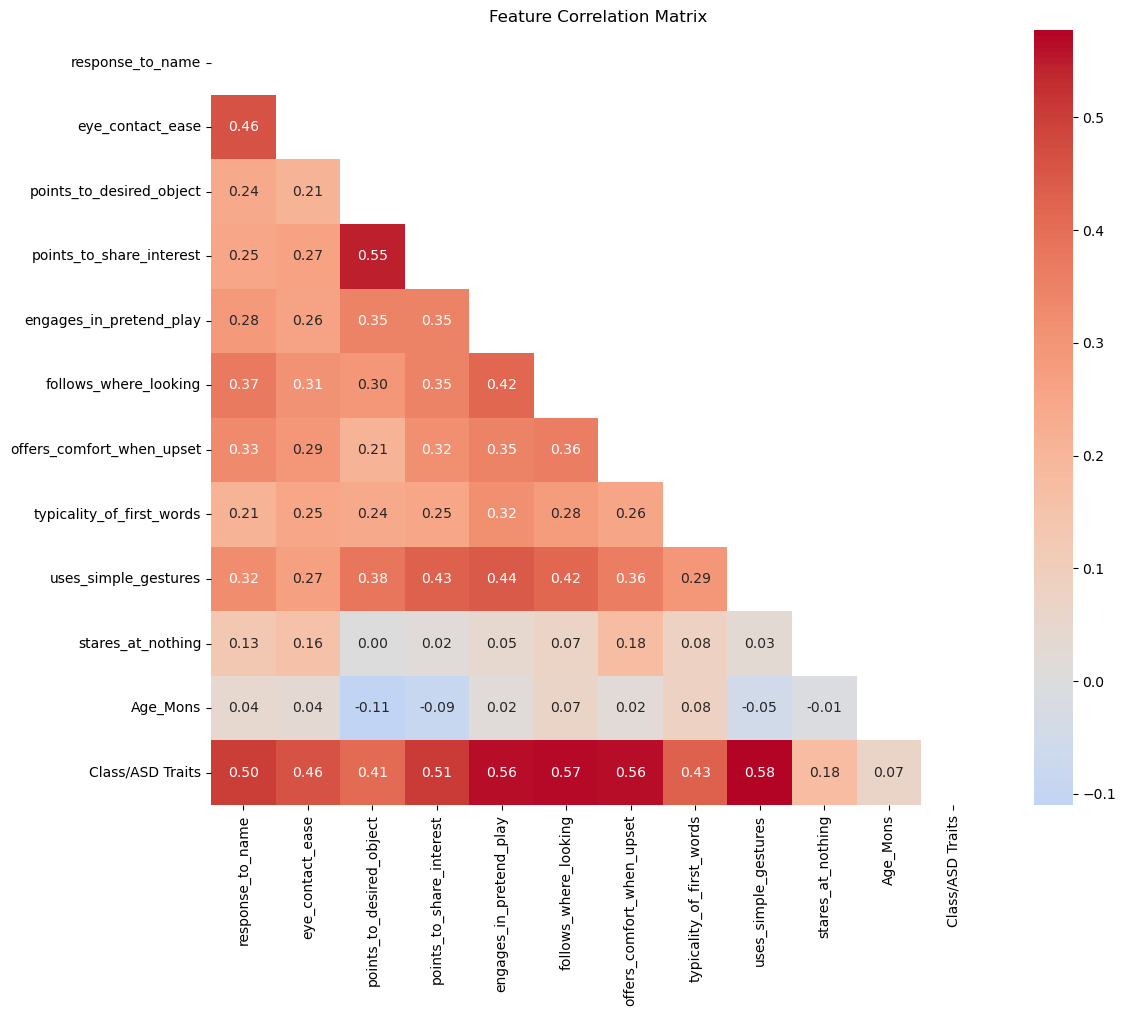

In [31]:
import seaborn as sns
numeric_df = df_processed.select_dtypes(include=[np.number])
numeric_df = numeric_df.drop(columns = ['Case_No'])
correlation_matrix = numeric_df.corr()
# Create correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm',
           center=0, square=True, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

Finding the highly correlated features

In [32]:
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i,j]
        if abs(corr_val) > 0.4:
            high_corr_pairs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                corr_val
            ))
print(f"Found {len(high_corr_pairs)} "
      "moderatley to highly correlated feature pairs (|r| > 0.4):")
for feat1, feat2, corr in high_corr_pairs:
    print(f"    {feat1} - {feat2}: {corr:.3f}")

Found 15 moderatley to highly correlated feature pairs (|r| > 0.4):
    response_to_name - eye_contact_ease: 0.463
    response_to_name - Class/ASD Traits: 0.504
    eye_contact_ease - Class/ASD Traits: 0.463
    points_to_desired_object - points_to_share_interest: 0.547
    points_to_desired_object - Class/ASD Traits: 0.410
    points_to_share_interest - uses_simple_gestures: 0.428
    points_to_share_interest - Class/ASD Traits: 0.505
    engages_in_pretend_play - follows_where_looking: 0.415
    engages_in_pretend_play - uses_simple_gestures: 0.442
    engages_in_pretend_play - Class/ASD Traits: 0.563
    follows_where_looking - uses_simple_gestures: 0.416
    follows_where_looking - Class/ASD Traits: 0.569
    offers_comfort_when_upset - Class/ASD Traits: 0.563
    typicality_of_first_words - Class/ASD Traits: 0.427
    uses_simple_gestures - Class/ASD Traits: 0.577


Find correlation with target variables:

In [33]:
corr_with_target_col = correlation_matrix[target_col].drop(target_col)
corr_with_target_col

response_to_name             0.503810
eye_contact_ease             0.463467
points_to_desired_object     0.409701
points_to_share_interest     0.505204
engages_in_pretend_play      0.563297
follows_where_looking        0.569424
offers_comfort_when_upset    0.563177
typicality_of_first_words    0.427155
uses_simple_gestures         0.577336
stares_at_nothing            0.179833
Age_Mons                     0.066831
Name: Class/ASD Traits, dtype: float64

In [34]:
target_correlations = corr_with_target_col.sort_values(
    key=abs, ascending=False
)
print(f"\nCorrelations with {target_col} (sorted by absolute value):")
for feature, corr in target_correlations.items():
    print(f"    {feature}: {corr:.3f}")


Correlations with Class/ASD Traits (sorted by absolute value):
    uses_simple_gestures: 0.577
    follows_where_looking: 0.569
    engages_in_pretend_play: 0.563
    offers_comfort_when_upset: 0.563
    points_to_share_interest: 0.505
    response_to_name: 0.504
    eye_contact_ease: 0.463
    typicality_of_first_words: 0.427
    points_to_desired_object: 0.410
    stares_at_nothing: 0.180
    Age_Mons: 0.067


Analyze age distribution

Age statistics by class

In [35]:
age_by_class = df_processed.groupby(target_col)['Age_Mons'].agg([
    'count', 'mean', 'std', 'min', 'max', 'median'
])
age_by_class

,count,mean,std,min,max,median
Class/ASD Traits,,,,,,
0,326,27.070552,8.936593,12,36,30.0
1,728,28.223901,7.491995,12,36,30.0


Statistical test for age difference

In [36]:
no_asd_ages = df_processed[df_processed[target_col] == 0]['Age_Mons']
asd_ages = df_processed[df_processed[target_col] == 1]['Age_Mons']
print(f"No ASD per ages: \n{no_asd_ages}\n")
print(f"ASD per ages: \n{asd_ages}\n")

No ASD per ages: 
0       28
8       36
12      25
14      18
16      36
        ..
1040    25
1041    25
1048    30
1049    24
1052    19
Name: Age_Mons, Length: 326, dtype: int64

ASD per ages: 
1       36
2       36
3       24
4       20
5       21
        ..
1046    24
1047    30
1050    12
1051    18
1053    24
Name: Age_Mons, Length: 728, dtype: int64



T-test for age differences between groups:

In [37]:
from scipy import stats
t_stat, p_value = stats.ttest_ind(no_asd_ages, asd_ages)
print(f"T-test Result: {t_stat:.4f}")
print(f"p value: {p_value:.2f}")
print(f"Significant difference: {'Yes' if p_value < 0.05 else 'No'}")

T-test Result: -2.1725
p value: 0.03
Significant difference: Yes


Visualization (Histogram by class, box plot, violin plot, scatter plot)

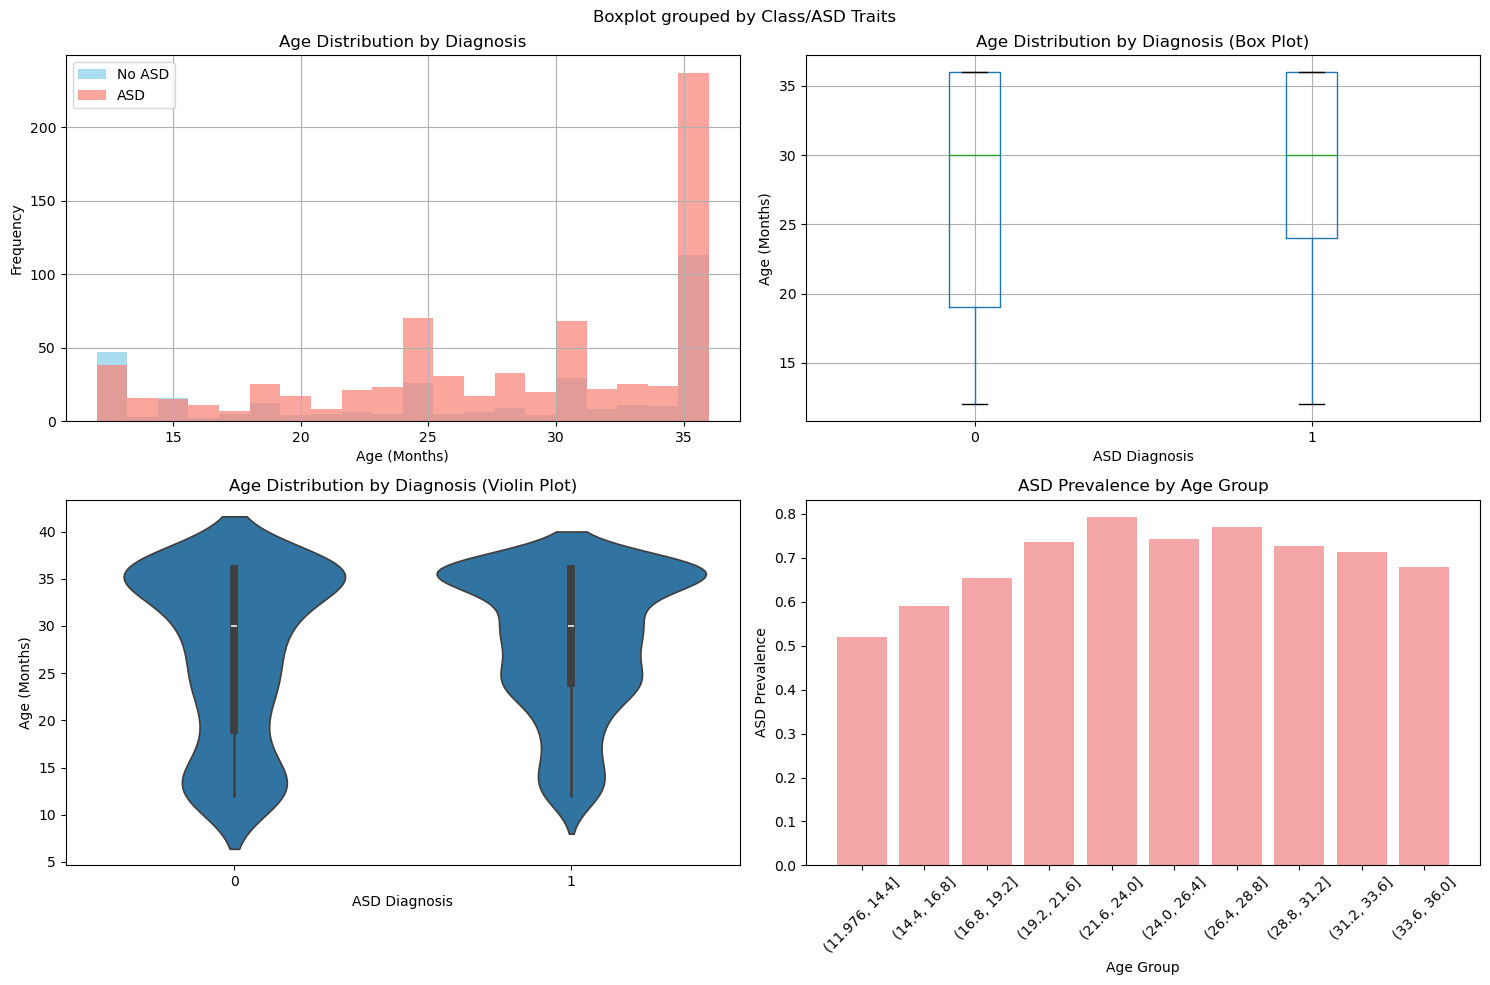

In [38]:
fig, axes = plt.subplots(2,2, figsize = (15,10))

no_asd_ages.hist(
    bins=20, alpha=0.7, label='No ASD', ax=axes[0,0], color='skyblue')
asd_ages.hist(
    bins=20, alpha=0.7, label='ASD', ax=axes[0,0], color='salmon')
axes[0,0].set_title('Age Distribution by Diagnosis')
axes[0,0].set_xlabel('Age (Months)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].legend()

# Box plot
df_processed.boxplot(column='Age_Mons', by=target_col, 
                         ax=axes[0,1])
axes[0,1].set_title('Age Distribution by Diagnosis (Box Plot)')
axes[0,1].set_xlabel('ASD Diagnosis')
axes[0,1].set_ylabel('Age (Months)')

# Violin plot
sns.violinplot(data=df_processed, x=target_col, 
              y='Age_Mons', ax=axes[1,0])
axes[1,0].set_title('Age Distribution by Diagnosis (Violin Plot)')
axes[1,0].set_xlabel('ASD Diagnosis')
axes[1,0].set_ylabel('Age (Months)')

# Create age bins and calculate ASD prevalence in each bin
age_bins = pd.cut(df_processed['Age_Mons'], bins=10)
asd_prevalence = df_processed.groupby(age_bins, observed=True)[target_col].mean()

axes[1,1].bar(range(len(asd_prevalence)), asd_prevalence.values, 
              color='lightcoral', alpha=0.7)
axes[1,1].set_title('ASD Prevalence by Age Group')
axes[1,1].set_xlabel('Age Group')
axes[1,1].set_ylabel('ASD Prevalence')
axes[1,1].set_xticks(range(len(asd_prevalence)))
axes[1,1].set_xticklabels([str(interval) for interval in asd_prevalence.index], 
                          rotation=45)

plt.tight_layout()
plt.show()

Analyze Q-CHAT-10 patterns

In [39]:
qchat_scores = df_processed[qchat_features].sum(axis=1)
df_processed['QCHAT_Total_Score'] = qchat_scores
qchat_by_class = df_processed.groupby(target_col)['QCHAT_Total_Score'].agg([
    'count', 'mean', 'std', 'min', 'max', 'median'
])
qchat_by_class

,count,mean,std,min,max,median
Class/ASD Traits,,,,,,
0,326,1.693252,1.066014,0,3,2.0
1,728,6.788462,1.921937,4,10,7.0


Individual Q-CHAT item analysis

In [40]:
qchat_item_analysis = {}
qchat_descriptions = {
    'response_to_name': 'Response to name',
    'eye_contact_ease': 'Eye contact ease', 
    'points_to_desired_object': 'Points to desired object',
    'points_to_share_interest': 'Points to share interest',
    'engages_in_pretend_play': 'Engages in pretend play',
    'follows_where_looking': 'Follows where looking',
    'offers_comfort_when_upset': 'Offers comfort when upset',
    'typicality_of_first_words': 'Typicality of first words',
    'uses_simple_gestures': 'Uses simple gestures',
    'stares_at_nothing': 'Stares at nothing'
}
for item in qchat_features:
    item_by_class = df_processed.groupby(target_col)[item].agg([
        'mean', 'std'
    ])
    qchat_item_analysis[item] = item_by_class
    print(f"\n{qchat_descriptions[item]}:")
    print(item_by_class)


Response to name:
                      mean       std
Class/ASD Traits                    
0                 0.190184  0.393050
1                 0.730769  0.443865

Eye contact ease:
                      mean       std
Class/ASD Traits                    
0                 0.104294  0.306112
1                 0.603022  0.489608

Points to desired object:
                      mean       std
Class/ASD Traits                    
0                 0.101227  0.302093
1                 0.535714  0.499066

Points to share interest:
                      mean       std
Class/ASD Traits                    
0                 0.134969  0.342216
1                 0.681319  0.466286

Engages in pretend play:
                      mean       std
Class/ASD Traits                    
0                 0.104294  0.306112
1                 0.712912  0.452714

Follows where looking:
                      mean       std
Class/ASD Traits                    
0                 0.156442  0.363832
1      

Create visualizations (Q-CHAT total score distribution, Q-CHAT score box plot, Individual Q-CHAT items heatmap, Q-CHAT score vs Age)

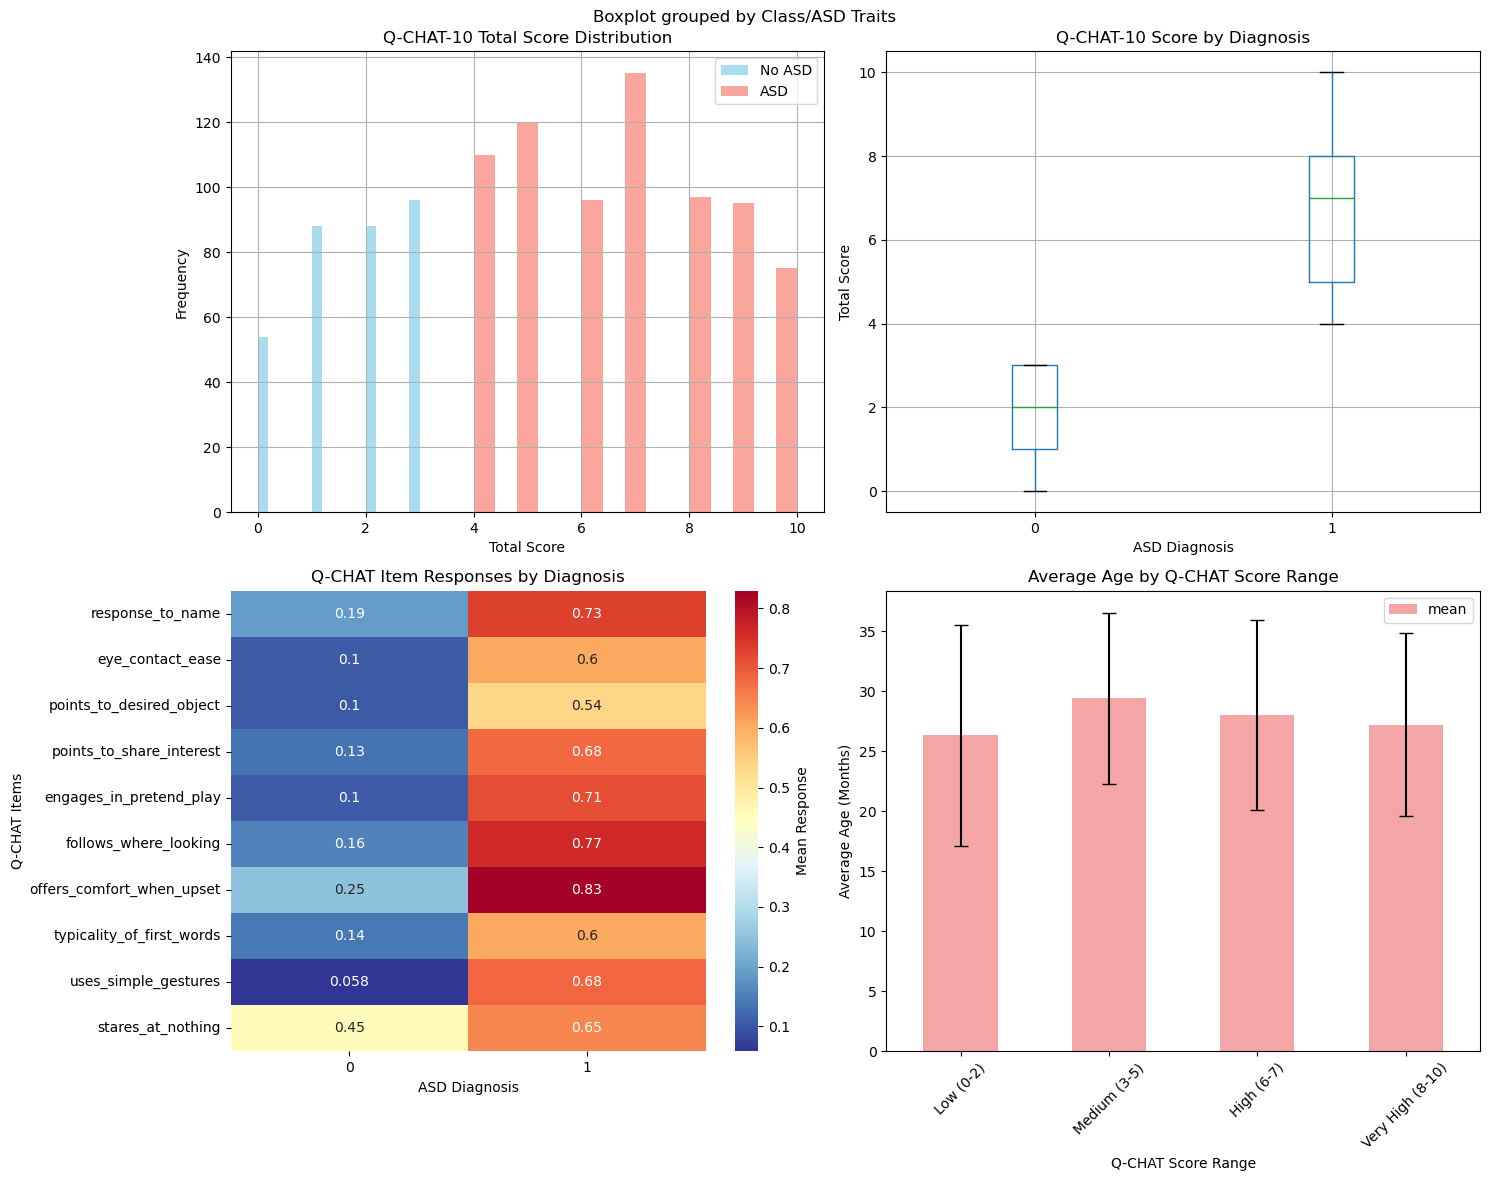

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Q-CHAT total score distribution
df_processed[df_processed[target_col] == 0]['QCHAT_Total_Score'].hist(
    bins=15, alpha=0.7, label='No ASD', ax=axes[0,0], color='skyblue')
df_processed[df_processed[target_col] == 1]['QCHAT_Total_Score'].hist(
    bins=15, alpha=0.7, label='ASD', ax=axes[0,0], color='salmon')
axes[0,0].set_title('Q-CHAT-10 Total Score Distribution')
axes[0,0].set_xlabel('Total Score')
axes[0,0].set_ylabel('Frequency')
axes[0,0].legend()

# Q-CHAT score box plot
df_processed.boxplot(column='QCHAT_Total_Score', 
                         by=target_col, ax=axes[0,1])
axes[0,1].set_title('Q-CHAT-10 Score by Diagnosis')
axes[0,1].set_xlabel('ASD Diagnosis')
axes[0,1].set_ylabel('Total Score')

# Individual Q-CHAT items heatmap
qchat_means = df_processed.groupby(target_col)[qchat_features].mean()
sns.heatmap(qchat_means.T, annot=True, cmap='RdYlBu_r', 
           ax=axes[1,0], cbar_kws={'label': 'Mean Response'})
axes[1,0].set_title('Q-CHAT Item Responses by Diagnosis')
axes[1,0].set_xlabel('ASD Diagnosis')
axes[1,0].set_ylabel('Q-CHAT Items')

# Alternative: Age distribution by Q-CHAT score ranges
qchat_ranges = pd.cut(df_processed['QCHAT_Total_Score'], 
                     bins=[-0.5, 2.5, 5.5, 7.5, 10.5], 
                     labels=['Low (0-2)', 'Medium (3-5)', 'High (6-7)', 'Very High (8-10)'])

age_by_qchat = df_processed.groupby(qchat_ranges, observed=True)['Age_Mons'].agg(['mean', 'std'])
age_by_qchat.plot(kind='bar', y='mean', yerr='std', ax=axes[1,1], 
                  color='lightcoral', alpha=0.7, capsize=5)
axes[1,1].set_title('Average Age by Q-CHAT Score Range')
axes[1,1].set_xlabel('Q-CHAT Score Range')
axes[1,1].set_ylabel('Average Age (Months)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Analyze demographics

In [42]:
demographic_features = stats_dict['categorical_features']
demographic_analysis = {}

for feature in demographic_features:
    if feature in df_processed.columns:
        print(f"\n{feature} Analysis:")
        crosstab = pd.crosstab(df_processed[feature],
                              df_processed[target_col],
                              margins=True)
        print(crosstab)

        proportions = pd.crosstab(df_processed[feature],
                                 df_processed[target_col],
                                 normalize='index')
        print(f"\nProportions by {feature}:")
        print(proportions)

        demographic_analysis[feature] = {
            'crosstab': crosstab,
            'proportions': proportions
        }


Sex Analysis:
Class/ASD Traits    0    1   All
Sex                             
f                 125  194   319
m                 201  534   735
All               326  728  1054

Proportions by Sex:
Class/ASD Traits         0         1
Sex                                 
f                 0.391850  0.608150
m                 0.273469  0.726531

Ethnicity Analysis:
Class/ASD Traits    0    1   All
Ethnicity                       
Hispanic           10   30    40
Latino              6   20    26
Native Indian       0    3     3
Others              6   29    35
Pacifica            1    7     8
White European     84  250   334
asian              87  212   299
black              14   39    53
middle eastern     92   96   188
mixed               3    5     8
south asian        23   37    60
All               326  728  1054

Proportions by Ethnicity:
Class/ASD Traits         0         1
Ethnicity                           
Hispanic          0.250000  0.750000
Latino            0.230769  0.

Visualization

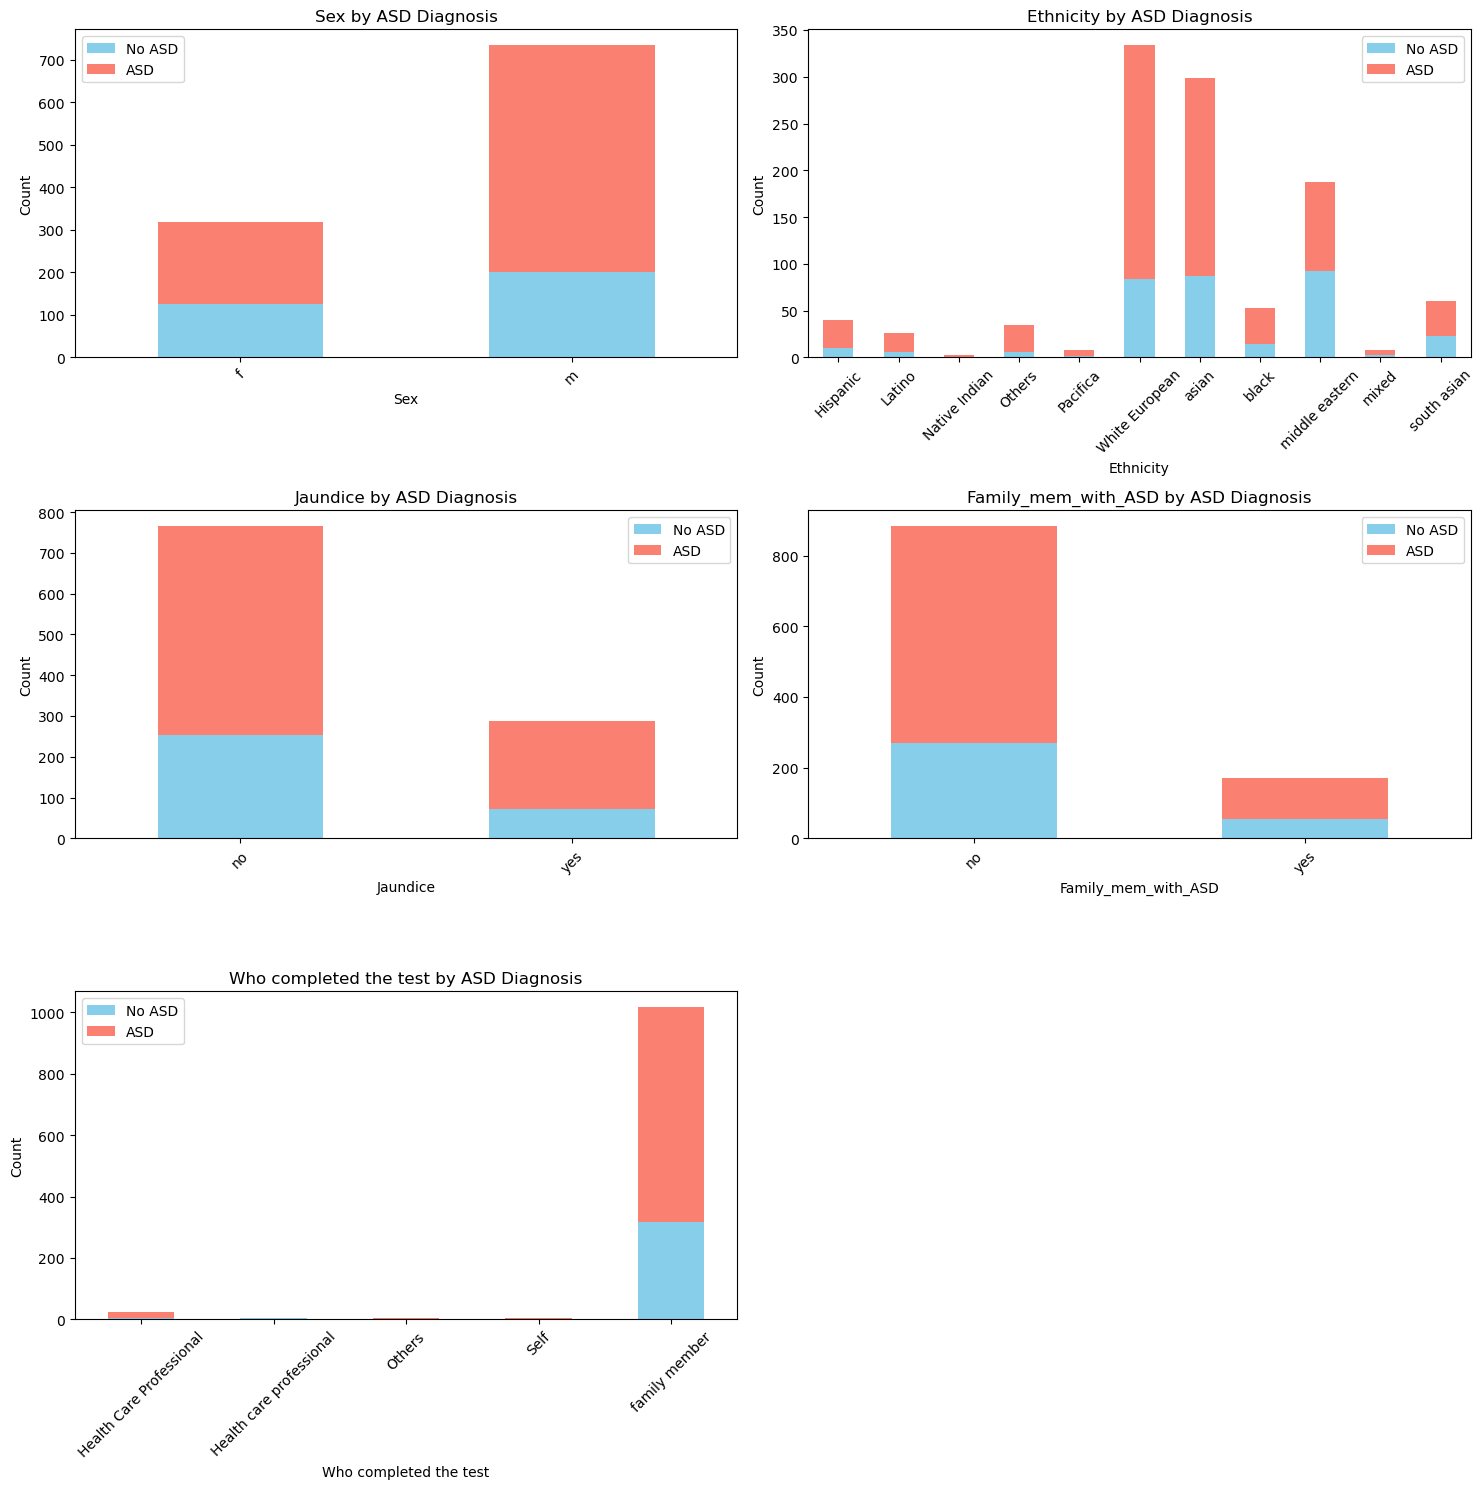

In [43]:
n_features = len(demographic_features)
n_cols = 2
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
if n_rows > 1:
    axes = axes.flatten()
if n_rows == 1:
    axes = [axes]

for i, feature in enumerate(demographic_features):
    if feature in df_processed.columns and i < len(axes):
        # Create stacked bar chart
        crosstab = pd.crosstab(df_processed[feature], 
                             df_processed[target_col])
        crosstab.plot(kind='bar', stacked=True, ax=axes[i],
                     color=['skyblue', 'salmon'])
        axes[i].set_title(f'{feature} by ASD Diagnosis')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Count')
        axes[i].legend(['No ASD', 'ASD'])
        axes[i].tick_params(axis='x', rotation=45)

# Hide empty subplots
for i in range(len(demographic_features), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

Traditional Machine Learning Models

Model 1: Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000]
}

class_weight_param = 'balanced'

base_model = LogisticRegression(
    random_state=random_state,
    class_weight=class_weight_param
)

cv_strategy = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=random_state
)

grid_search = GridSearchCV(
    base_model,
    param_grid,
    cv=cv_strategy,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_balanced,y_train_balanced)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


,estimator,LogisticRegre...ndom_state=42)
,param_grid,"{'C': [0.001, 0.01, ...], 'max_iter': [1000], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [45]:
models = {}
best_params = {}
cv_results = {}

models['logistic_regression'] = grid_search.best_estimator_
best_params['logistic_regression'] = grid_search.best_params_
cv_results['logistic_regression'] = {
    'best_score': grid_search.best_score_,
    'cv_results': grid_search.cv_results_
}

print("Best parameters:")
pprint(grid_search.best_params_)
print("\nBest CV F1-score:")
pprint(grid_search.best_score_)

Best parameters:
{'C': 1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}

Best CV F1-score:
np.float64(1.0)


Model 2: Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

base_model = RandomForestClassifier(
    random_state=random_state,
    class_weight=class_weight_param,
    n_jobs=-1
)

cv_strategy = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=random_state
)

grid_search = GridSearchCV(
    base_model,
    param_grid,
    cv=cv_strategy,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_balanced, y_train_balanced)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [5, 10, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,300


In [47]:
models['random_forest'] = grid_search.best_estimator_
best_params['random_forest'] = grid_search.best_params_
cv_results['random_forest'] = {
    'best_score': grid_search.best_score_,
    'cv_results': grid_search.cv_results_
}

print("Best parameters:")
pprint(grid_search.best_params_)
print("\nBest CV F1-score:")
pprint(grid_search.best_score_)

Best parameters:
{'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

Best CV F1-score:
np.float64(0.9705679775946019)


Model 3: XGBoost

In [48]:
import xgboost as xgb

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

scale_pos_weight = 1.0

base_model = xgb.XGBClassifier(
    random_state=random_state,
    scale_pos_weight=scale_pos_weight,
    n_jobs=-1,
    eval_metric='logloss'
)

cv_strategy = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=random_state
)

grid_search = GridSearchCV(
    base_model,
    param_grid,
    cv=cv_strategy,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_balanced, y_train_balanced)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'colsample_bytree': [0.6, 0.8, ...], 'gamma': [0, 0.1, ...], 'learning_rate': [0.01, 0.05, ...], 'max_depth': [3, 5, ...], ...}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [49]:
models['xgboost'] = grid_search.best_estimator_
best_params['xgboost'] = grid_search.best_params_
cv_results['xgboost'] = {
    'best_score': grid_search.best_score_,
    'cv_results': grid_search.cv_results_
}
print("Best parameters:")
pprint(grid_search.best_params_)
print("\nBest CV F1-score:")
pprint(grid_search.best_score_)

Best parameters:
{'colsample_bytree': 0.6,
 'gamma': 0,
 'learning_rate': 0.2,
 'max_depth': 7,
 'n_estimators': 300,
 'subsample': 0.8}

Best CV F1-score:
np.float64(0.9950147783251232)


Model 4: Support Vector Machine

In [50]:
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.001, 0.01, 0.1],
    'kernel': ['rbf']
}

class_weight_param = 'balanced'

# Base model is different from the rest because
# SVM can take a long time with the original values
base_model = SVC(
    random_state=random_state,
    class_weight=class_weight_param,
    probability=True,
    cache_size=1000,
    max_iter=10000
)

cv_strategy = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=random_state
)

grid_search = GridSearchCV(
    base_model,
    param_grid,
    cv=cv_strategy,
    scoring='f1',
    n_jobs=-1,
    verbose=2 #more verbose output to see progress
)

grid_search.fit(X_train_balanced, y_train_balanced)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


,estimator,SVC(cache_siz...ndom_state=42)
,param_grid,"{'C': [0.1, 1, ...], 'gamma': ['scale', 0.001, ...], 'kernel': ['rbf']}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


In [51]:
models['svm'] = grid_search.best_estimator_
best_params['svm'] = grid_search.best_params_
cv_results['svm'] = {
    'best_score': grid_search.best_score_,
    'cv_results': grid_search.cv_results_
}
print("Best parameters:")
pprint(grid_search.best_params_)
print("\nBest CV F1-score:")
pprint(grid_search.best_score_)

Best parameters:
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

Best CV F1-score:
np.float64(1.0)


In [52]:
best_model = grid_search.best_estimator_
from sklearn.metrics import f1_score
y_test_pred = best_model.predict(X_test_scaled)
true_f1_score = f1_score(y_test, y_test_pred)

print(f"True Test F1 Score: {true_f1_score:.4f}")

True Test F1 Score: 1.0000


In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix

print("="*60)
print("ALL MODELS - TEST SET PERFORMANCE")
print("="*60)

for model_name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    test_f1 = f1_score(y_test, y_pred)
    test_acc = accuracy_score(y_test, y_pred)
    
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"\n{model_name.upper()}:")
    print(f"  F1 Score: {test_f1:.4f}")
    print(f"  Accuracy: {test_acc:.4f}")
    print(f"  Confusion Matrix: {cm.tolist()}")

# Verify you're testing on scaled data
print("\nVerifying test data is scaled:")
print(f"X_test_scaled mean: {X_test_scaled.mean().mean():.4f}")
print(f"X_test_scaled std: {X_test_scaled.std().mean():.4f}")

# Also check the original unscaled test data stats for comparison
print(f"\nOriginal X_test mean: {X_test.mean().mean():.4f}")
print(f"Original X_test std: {X_test.std().mean():.4f}")

# Check the original dataset for any anomalies
print("Original dataset class distribution:")
df_encoded['Class/ASD Traits '].value_counts()
print(f"Class balance: {df_encoded['Class/ASD Traits '].value_counts(normalize=True)}")

# Check some statistics about Q-CHAT responses
qchat_features = ['response_to_name', 'eye_contact_ease', 
                  'points_to_desired_object', 'points_to_share_interest',
                  'engages_in_pretend_play', 'follows_where_looking',
                  'offers_comfort_when_upset', 'typicality_of_first_words',
                  'uses_simple_gestures', 'stares_at_nothing']

print("\nQ-CHAT response means by class (full table):")
qchat_comparison = df_encoded.groupby('Class/ASD Traits ')[qchat_features].mean()
print(qchat_comparison.T)

print("\nDifference between classes:")
difference = qchat_comparison.loc[1] - qchat_comparison.loc[0]
difference.sort_values(ascending=False)

ALL MODELS - TEST SET PERFORMANCE

LOGISTIC_REGRESSION:
  F1 Score: 1.0000
  Accuracy: 1.0000
  Confusion Matrix: [[49, 0], [0, 110]]

RANDOM_FOREST:
  F1 Score: 0.9767
  Accuracy: 0.9686
  Confusion Matrix: [[49, 0], [5, 105]]

XGBOOST:
  F1 Score: 0.9954
  Accuracy: 0.9937
  Confusion Matrix: [[49, 0], [1, 109]]

SVM:
  F1 Score: 1.0000
  Accuracy: 1.0000
  Confusion Matrix: [[49, 0], [0, 110]]

Verifying test data is scaled:
X_test_scaled mean: -0.0080
X_test_scaled std: 1.0145

Original X_test mean: 2.7779
Original X_test std: 1.0545
Original dataset class distribution:
Class balance: Class/ASD Traits 
1    0.690702
0    0.309298
Name: proportion, dtype: float64

Q-CHAT response means by class (full table):
Class/ASD Traits                  0         1
response_to_name           0.190184  0.730769
eye_contact_ease           0.104294  0.603022
points_to_desired_object   0.101227  0.535714
points_to_share_interest   0.134969  0.681319
engages_in_pretend_play    0.104294  0.712912
fol

uses_simple_gestures         0.624410
follows_where_looking        0.608668
engages_in_pretend_play      0.608618
offers_comfort_when_upset    0.581204
points_to_share_interest     0.546349
response_to_name             0.540585
eye_contact_ease             0.498727
typicality_of_first_words    0.460544
points_to_desired_object     0.434487
stares_at_nothing            0.191617
dtype: float64